<a href="https://colab.research.google.com/github/davidofitaly/machine-learning-notes/blob/main/unsupervised/02_dimensionality_reduction/05_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

###Loading data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


###Data visualization

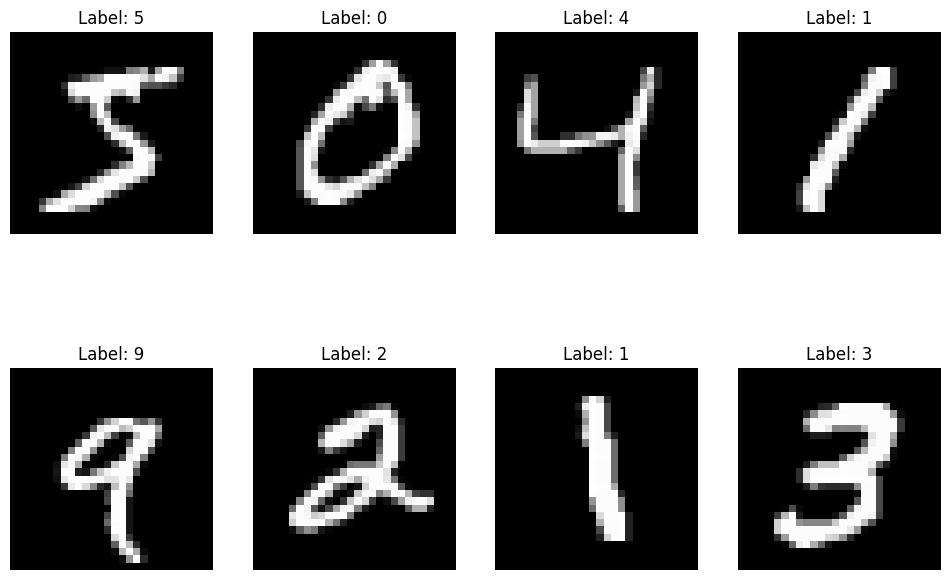

In [11]:
plt.figure(figsize=(12,8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}', color='black')
    plt.axis('off')
plt.show()

In [13]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(10000, 784)

###Standarization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

###PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape


(10000, 3)

###Explained variance

In [17]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results


,explained_variance_ratio,cumulative,component
0,0.061640,0.061640,1
1,0.043662,0.105302,2
2,0.040458,0.145760,3


In [23]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))

fig.show()

In [29]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,-0.997658,-4.651824,-0.740503,5.0
1,8.682762,-7.124047,-4.195260,0.0
2,2.439044,10.567199,-4.057029,4.0
3,-7.291481,-3.686028,3.064818,1.0
4,-4.791476,4.498186,-5.603754,9.0


In [31]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950, title='PCA - 2 components', template='plotly_dark')

In [32]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', opacity=0.5, width=950, height=700, title='PCA - 3 components', template='plotly_dark')

###t-sne

####2 components

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 10.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.030922
[t-SNE] KL divergence after 1000 iterations: 1.700574


In [60]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

,tsne_1,tsne_2,class
0,0.247771,-37.176025,5.0
1,72.349075,-6.220335,0.0
2,2.543155,77.788467,4.0
3,-62.818600,-7.466608,1.0
4,-22.368208,71.280876,9.0
...,...,...,...
9995,-18.056635,-57.036270,5.0
9996,-3.852414,-12.739563,8.0
9997,33.561771,-51.767429,6.0
9998,-15.730064,53.305145,9.0


In [36]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700, template='plotly_dark', title='TSNE - 2 components')

###Comparison PCA vs. t-SNE

In [65]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['PCA', 't-SNE'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0,10):
    fig.add_trace(fig1['data'][i], row=1, col=1),
    fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()


###50 components

In [68]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [67]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 0.313s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.659550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.211838
[t-SNE] KL divergence after 1000 iterations: 1.265116


In [69]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

,tsne_1,tsne_2,class
0,9.029703,-44.322105,5.0
1,52.358162,-52.887169,0.0
2,27.704309,70.629784,4.0
3,-50.501305,-42.301861,1.0
4,-31.393555,67.831055,9.0
...,...,...,...
9995,-2.066763,-79.272888,5.0
9996,11.719536,21.985107,8.0
9997,-34.072365,-45.031380,6.0
9998,-49.881989,53.819778,9.0


In [72]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='t-SNE - 2 components after PCA')

In [73]:

fig = make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
    fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, template='plotly_dark')
fig.show()